In [10]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
from skyfield.api import load
from skyfield import almanac
from skyfield import units
from skyfield.elementslib import osculating_elements_of

planets = load('de421.bsp')

In [11]:
earth = planets["earth"]
moon = planets["moon"]
sun = planets["sun"]
m_to_e = moon - earth
s_to_e = sun - earth
print(planets)
ts = load.timescale()
t_now = ts.now()
r_moon = units.Distance(km=1737.4)
r_earth = units.Distance(km=6378)
r_sun = units.Distance(km=695700)

SPICE kernel file 'de421.bsp' has 15 segments
  JD 2414864.50 - JD 2471184.50  (1899-07-28 through 2053-10-08)
      0 -> 1    SOLAR SYSTEM BARYCENTER -> MERCURY BARYCENTER
      0 -> 2    SOLAR SYSTEM BARYCENTER -> VENUS BARYCENTER
      0 -> 3    SOLAR SYSTEM BARYCENTER -> EARTH BARYCENTER
      0 -> 4    SOLAR SYSTEM BARYCENTER -> MARS BARYCENTER
      0 -> 5    SOLAR SYSTEM BARYCENTER -> JUPITER BARYCENTER
      0 -> 6    SOLAR SYSTEM BARYCENTER -> SATURN BARYCENTER
      0 -> 7    SOLAR SYSTEM BARYCENTER -> URANUS BARYCENTER
      0 -> 8    SOLAR SYSTEM BARYCENTER -> NEPTUNE BARYCENTER
      0 -> 9    SOLAR SYSTEM BARYCENTER -> PLUTO BARYCENTER
      0 -> 10   SOLAR SYSTEM BARYCENTER -> SUN
      3 -> 301  EARTH BARYCENTER -> MOON
      3 -> 399  EARTH BARYCENTER -> EARTH
      1 -> 199  MERCURY BARYCENTER -> MERCURY
      2 -> 299  VENUS BARYCENTER -> VENUS
      4 -> 499  MARS BARYCENTER -> MARS


In [12]:
t = ts.utc(2023, 7, np.arange(365))
phases = almanac.find_discrete(ts.utc(2023, 7, 1),ts.utc(2024, 7, 1), almanac.moon_phases(planets))
# phases = dict(zip(phases[0], phases[1]))
news = phases[0][phases[1]==0]

In [13]:
news

<Time tt=[2460143.2729093735 ... 2460468.027007889] len=12>

In [14]:
sun_at_news = s_to_e.at(news)
moon_at_news = m_to_e.at(news)
e_lat_sun, e_lon_sun, d_sun = s_to_e.at(news).ecliptic_latlon()
e_lat_moon, e_lon_moon, d_moon = m_to_e.at(news).ecliptic_latlon()

In [15]:
ang_sun = 2*np.arctan(r_sun.km / d_sun.km) * 180 / np.pi
ang_moon = 2*np.arctan(r_moon.km / d_moon.km) * 180 / np.pi

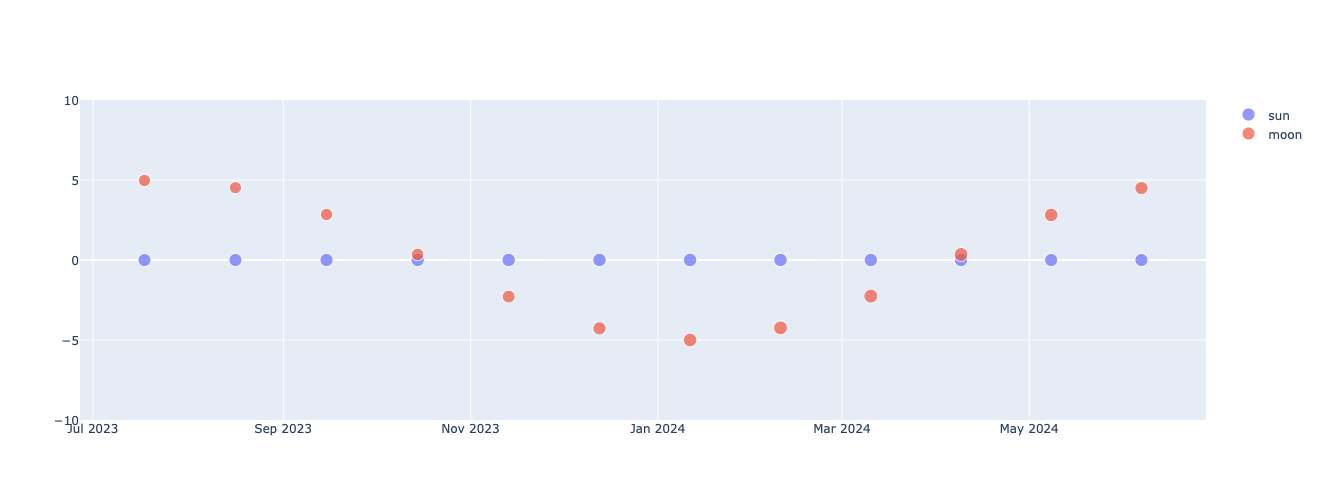

In [16]:
fig = go.Figure()
fig.update_layout(dict(height=500), yaxis_range=[-10, 10])
fig.add_trace(go.Scatter(y=e_lat_sun.degrees, x=news.utc_datetime(), mode='markers', name="sun"))
fig.add_trace(go.Scatter(y=e_lat_moon.degrees, x=news.utc_datetime(), mode='markers', name="moon"))
fig.update_traces(marker=dict(size=ang_sun*25), selector=dict(name="sun"))
fig.update_traces(marker=dict(size=ang_moon*25), selector=dict(name="moon"))


fig.show()

In [17]:
fig.select_traces(

SyntaxError: incomplete input (570054698.py, line 1)

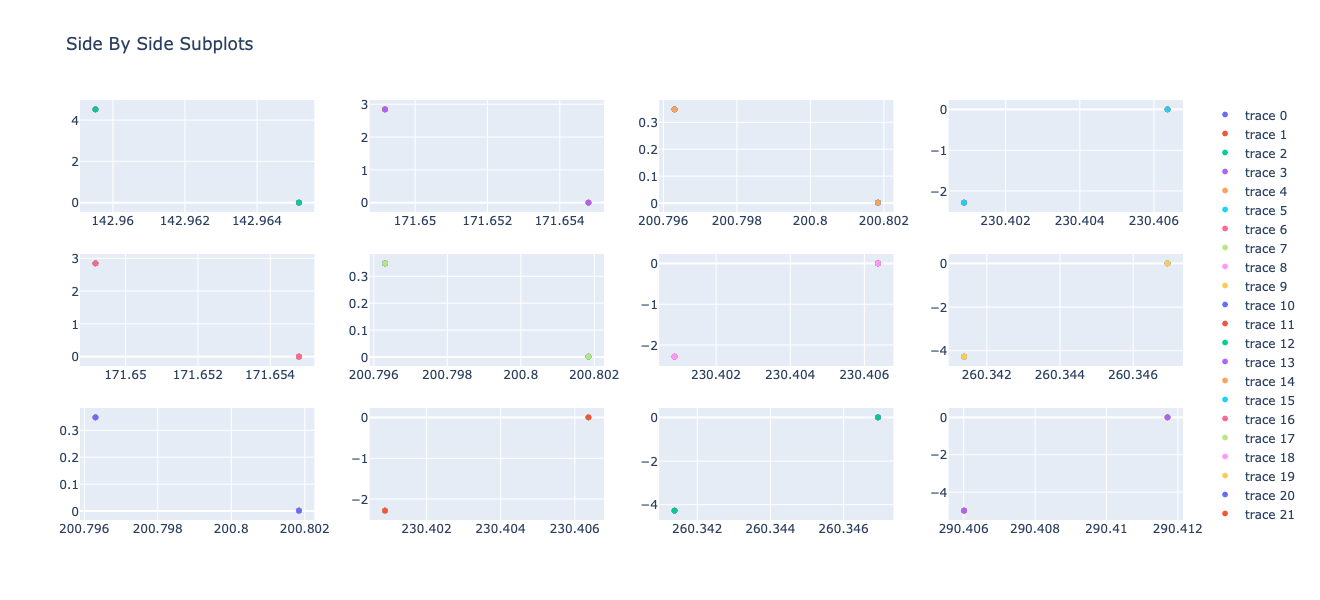

In [18]:
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=4)

for new in news:
    for row in range(3):
        for col in range(4):
            fig.add_trace(go.Scatter(x=[e_lon_sun.degrees[(row+1) + col], e_lon_moon.degrees[(row+1) + col]],
                                     y=[e_lat_sun.degrees[(row+1) + col], e_lat_moon.degrees[(row+1) + col]], mode="markers"),
                          row = row+1, col=col+1)

#fig.add_trace(
#    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
#    row=1, col=1
#)

#fig.add_trace(
#    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
#    row=1, col=2
#)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()